# Initial parameters

In [240]:
# CODE DEMO!

In [241]:
# CODE DEMO

env = 'colab'  # 'colab' or 'pc'
using_gpu = True  # True or False

saving_metrics_report = True
saving_train_times = True
saving_histories = True

test_percentage = 0.99

git_download_path = 'https://raw.githubusercontent.com/PashaIanko/Covid19Classifier/main/'
# Number of trial for this day (-> directory/24-01-22/trial-{n_trial}/ -- example of directories)

In [242]:
names = ['AlexNet']
date_ = '2022-06-02-Demo'
n_trial = 'AlexNetCLAHE'

# Packages & functions

In [243]:
def plot_learning_curves(histories_dict):
    for name, df in histories_dict.items():
        _, ax = plt.subplots()

        acc = df['acc']
        val_acc = df['val_acc']
        ax.plot(acc, marker = 'o')
        ax.plot(val_acc, marker = 'o')
        ax.set_title(name)
        ax.legend(['acc', 'val_acc'])
        plt.grid()

def get_empty_models():
    res = {
        'CNN': CNNModel(name = 'CNN'),
        'VGG19': VGG19Model(name = 'VGG19'),
        'VGG16': VGG16Model(name = 'VGG16'),
        'BN': BNModel(name = 'BN_CNN'),
        'Dropout': DropoutModel(name = 'Dropout'),
        'AlexNet': AlexNetModel(name = 'AlexNet')
    }
    return res
    
def construct_utils(model_name):
    return ModelUtils(

        model_params_dict = dict(**model_params),

        checkpoint_params_dict = dict(
            filepath = f'{DataProps.checkpoint_path}{model_name}/',
            **checkpoint_params
        ),

        train_params_dict = dict(
            **train_params
        )
    )

def get_models(model_names):
    empty_models = get_empty_models()
    empty_model_names = list(empty_models.keys())
    res = {}

    for name in model_names:
        assert name in empty_model_names
        model = empty_models[name]
        utils = construct_utils(name)

        res.update(
            {
                name: {
                    'model': model,
                    'utils': utils
                }
            }
        )
    return res

In [244]:
def reload_models(names, directory):
    res_dict = {}
    models = get_models(names)
    for name, model_parameters in models.items():
    
        model = model_parameters['model']
        utils = model_parameters['utils']
        
        model.construct_model()
        model.compile_model(**utils.model_params_dict)
        load_dir = f'{directory}{model.name}/{model.name}.h5'
    
        model.model.load_weights(load_dir)
        res_dict[name] = model
    
    return res_dict

# def reload_models(names, directory):
#     res_dict = {}
#     models = get_models(names)
#     for name, model_parameters in models.items():
    
#         model = model_parameters['model']
#         utils = model_parameters['utils']
        
#         model.construct_model()
#         model.compile_model(**utils.model_params_dict)
#         load_dir = f'{directory}{model.name}/{model.name}.h5'
    
#         model.model.load_weights(load_dir)
#         res_dict[name] = model

def visualize_train_time(df, names):
    _, ax = plt.subplots()
    for name in names:
        values = df[name].values
        values = values[values != '']  # yes, crappy code, i dont have a lot of time yet
        ax.plot(*values, marker = 'o')
    ax.set_title(name)
    ax.legend(names)

def visualize_time_per_epoch(df, names):
    fig, ax = plt.subplots()
    for name in names:
        time_series = df[name].values
        time_series = time_series[time_series != '']
        time_series = time_series[0]
        deltas = [time_series[i] - time_series[i-1] for i in range(1, len(time_series))]
        deltas.insert(0, time_series[0])
        print(deltas[0], type(deltas[0]))
        ax.plot(deltas, marker = 'o', markersize = 12)
    ax.grid()
    ax.legend(names)

def normalize_col(df, colnames):
    for c in colnames:
        df[c + '_norm'] = df[c] / np.max(df[c])

In [245]:
# %%capture
def download_files(url_dict):
    for file, url in url_dict.items():
        print(f'Downloading {file}')
        !wget -O {file} {url} {file}


if env == 'colab':
    from google.colab import drive
    drive.mount('/content/drive')

    
    files = [
            'DataProperties.py',
            'DatasetParameters.py',
            'Preprocessing.py',
            'PreprocessingParameters.py',
            
            'Model.py',
            'BNModel.py',
            'CNNModel.py',
            'VGG19Model.py',
            'VGG16Model.py',
            'AlexNetModel.py',
            'DropoutModel.py',
            'InceptionModel.py',
            'ResNetModel.py',

            'Utils.py',
            'ModelUtils.py',
            'TimeCallBack.py'
    ]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [246]:
%%capture
if env == 'colab':
    url_dict = {file: git_download_path + file for file in files[:3]}
    download_files(url_dict)

In [247]:
%%capture
if env == 'colab':
    url_dict = {file: git_download_path + file for file in files[3:6]}
    download_files(url_dict)

In [248]:
%%capture
if env == 'colab':
    url_dict = {file: git_download_path + file for file in files[6:]}
    download_files(url_dict)

In [249]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [250]:
from os.path import isdir
import os
import numpy as np

# Plotting
import seaborn as sns

# Utils
import importlib
from os.path import isdir
from datetime import date
import pandas as pd

# Dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [251]:
import DataProperties 
import PreprocessingParameters 
import Preprocessing
import DatasetParameters
import Utils
import CNNModel
import BNModel
import ResNetModel
import DropoutModel
import InceptionModel
import AlexNetModel
import VGG19Model
import VGG16Model
import Model
import ModelUtils
import TimeCallBack

def reload_all(modules_list):
    for module in modules_list:
        importlib.reload(module)

reload_all(
    [
        DataProperties,
        PreprocessingParameters,
        DatasetParameters,
        Utils,
        Preprocessing,

        Model,
        CNNModel,
        BNModel,
        DropoutModel,
        
        VGG16Model,
        ResNetModel,
        InceptionModel,
        ModelUtils,
        TimeCallBack,
        VGG19Model,
        AlexNetModel
    ]
)

from DataProperties import DataProperties
from PreprocessingParameters import PreprocessingParameters
from DatasetParameters import DatasetParameters
from Utils import *
from Preprocessing import *
from CNNModel import CNNModel
from BNModel import BNModel
from DropoutModel import DropoutModel
from VGG19Model import VGG19Model
from ResNetModel import ResNetModel
from InceptionModel import InceptionModel
from ModelUtils import ModelUtils
from TimeCallBack import TimeCallBack
from AlexNetModel import AlexNetModel
from VGG16Model import VGG16Model

In [252]:
DataProps = DataProperties(
    environment = env,
    n_trial = n_trial
)

# Class balance

## Paths download

In [253]:
assert isdir(DataProps.test_data_path) == True
assert isdir(DataProps.models_path) == True

In [254]:
train_files = calc_files(directory = DataProps.train_data_path)
train_covid_files = calc_files(DataProps.train_covid_path)
train_pn_files = calc_files(DataProps.train_pneumonia_path)
train_healthy_files = calc_files(DataProps.train_healthy_path)

assert train_files == (train_covid_files + train_pn_files + train_healthy_files)

In [255]:
val_files = calc_files(directory = DataProps.val_data_path)
val_covid_files = calc_files(DataProps.val_covid_path)
val_pn_files = calc_files(DataProps.val_pneumonia_path)
val_healthy_files = calc_files(DataProps.val_healthy_path)

assert val_files == (val_covid_files + val_pn_files + val_healthy_files)

In [256]:
test_files = calc_files(DataProps.test_data_path)
test_covid_files = calc_files(DataProps.test_covid_path)
test_pn_files = calc_files(DataProps.test_pneumonia_path)
test_healthy_files = calc_files(DataProps.test_healthy_path)

assert test_files == (test_covid_files + test_pn_files + test_healthy_files)

Text(0, 0.5, 'Proportion of data (%)')

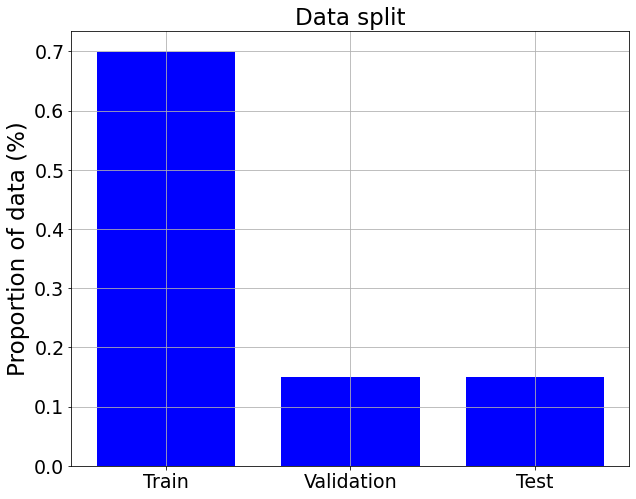

In [257]:
sum = train_files + val_files + test_files

x = ['Train', 'Validation', 'Test']
y = [train_files / sum, val_files / sum, test_files / sum]

fig, ax = plt.subplots(figsize = (10, 8))    
width = 0.75 # the width of the bars 
ax.bar(x, y, width, color="blue")
ax.tick_params(axis='both', which='major', labelsize=19)
ax.grid()


fontsize = 23

plt.title('Data split', fontsize = fontsize)
plt.xlabel('', fontsize = fontsize)
plt.ylabel('Proportion of data (%)', fontsize = fontsize) 

## Class proportion in data

In [258]:
train_c_prop = train_covid_files / train_files
train_pn_prop = train_pn_files / train_files
train_healthy_prop = train_healthy_files / train_files

val_c_prop = val_covid_files / val_files
val_pn_prop = val_pn_files / val_files
val_healthy_prop = val_healthy_files / val_files

test_c_prop = test_covid_files / test_files
test_pn_prop = test_pn_files / test_files
test_healthy_prop = test_healthy_files / test_files

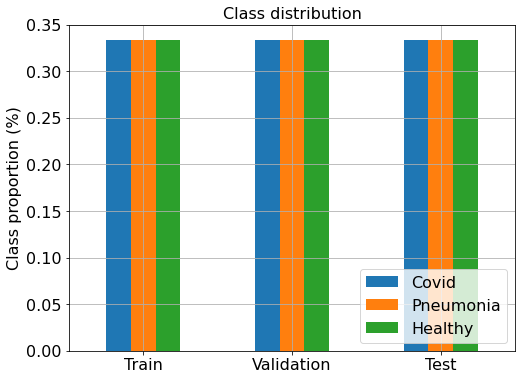

In [259]:
df = pd.DataFrame(
    [
     ['Train',      train_c_prop, train_pn_prop, train_healthy_prop],
     ['Validation', val_c_prop, val_pn_prop, val_healthy_prop],
     ['Test',       test_c_prop, test_pn_prop, test_healthy_prop]
    ],
    columns = ['Dataset', 'Covid', 'Pneumonia', 'Healthy']
)

fontsize = 16
ax = df.plot(
    x = 'Dataset',
    kind = 'bar',
    stacked = False,
    # title = 'Class distribution',
    xlabel = '',
    # ylabel = 'Class proportion (%)',
    fontsize = fontsize,
    rot = 0,
    legend = False,
    figsize = (8, 6),
    #cmap = 'inferno'
)

ax.grid()
ax.set_ylabel('Class proportion (%)', fontdict = {'fontsize': fontsize})
ax.set_title('Class distribution', fontsize = fontsize)
ax.legend(['Covid', 'Pneumonia', 'Healthy'], fontsize = 16, loc='lower right')

# Creating test dataset

## Create

In [260]:
input_sizes = {
    'VGG16': (224, 224),
    'VGG19': (224, 224),
    'AlexNet': (256, 256)
}

assert len(names) == 1
if names[0] in list(input_sizes.keys()):
    target_shape = input_sizes[names[0]]
else:
    target_shape = PreprocessingParameters.target_shape

print(f'Target shape is {target_shape}')

if names[0] == 'VGG16' or names[0] == 'VGG19':
    assert target_shape == (224, 224)
if names[0] == 'AlexNet':
    assert target_shape == (256, 256)

Target shape is (256, 256)


In [261]:
test_generator = ImageDataGenerator(
    preprocessing_function = Preprocessing.preprocess,
    validation_split = 1 - test_percentage
)

test_flow = test_generator.flow_from_directory(
    directory = DataProps.test_data_path,
    target_size = target_shape,  # PreprocessingParameters.target_shape,
    color_mode = 'rgb',
    classes = DataProperties.classes,
    class_mode = 'sparse',
    shuffle = DatasetParameters.shuffle_test,
    seed = DatasetParameters.seed,
    batch_size = 1,
    subset = 'training'
)

test_steps = test_flow.n // test_flow.batch_size

print(f'Use {test_flow.n} images for test')
print(f'Test steps: {test_steps}')

Found 681 images belonging to 3 classes.
Use 681 images for test
Test steps: 681


## Visualize test dataset

(1, 256, 256, 3) 1.0


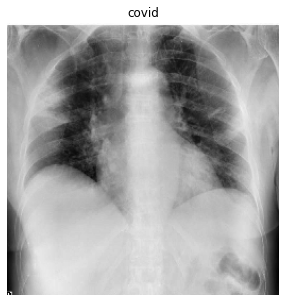

In [262]:
how_many_to_show = 1
flow = test_flow
for _ in range(how_many_to_show):
    batch, labels = flow.next()
    print(batch.shape, np.max(batch))
    assert np.max(batch) <= 1.01
    assert np.min(batch) >= 0.0
    
    visualize(
        batch, 
        labels, 
        how_many_to_show, 
        class_indices = flow.class_indices,
        figsize=(5, 5)
    )

## Get_models()

In [263]:
train_params = dict(
    train_flow = None, # no need here
    train_steps = None, # no need here
    val_flow = None, # no need here
    val_steps = None, # no need here
    epochs = None  # no need here
)

model_params = dict(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['acc'] 
)

checkpoint_params = dict(
    save_freq = 'epoch',
    save_weights_only = True,
    save_best_only = False,
    verbose = 1
)

In [264]:
if using_gpu:
    device_name = tf.test.gpu_device_name()
    if device_name != '/device:GPU:0':
        print(
            '\n\nThis error most likely means that this notebook is not '
            'configured to use a GPU.  Change this in Notebook Settings via the '
            'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
        raise SystemError('GPU device not found')

# Models evaluation

## Models reload

In [265]:
evaluation_path = f'{DataProps.core_path}{date_}/trial-{n_trial}/'
models = reload_models(names, directory = evaluation_path)

In [266]:
models

{'AlexNet': <AlexNetModel.AlexNetModel at 0x7f65f9fec150>}

## Summaries

In [267]:
empty_models = get_models(names)
for name in names:
    print(f'\nPrinting summary of {name}')
    print_summary(empty_models, name)


Printing summary of AlexNet
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 62, 62, 96)        34944     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 30, 30, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 30, 30, 256)       614656    
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 14, 14, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 14, 14, 384)       885120    
                                                                 
 conv2d_68 (Conv2D)     

## Reload history and training time

In [268]:
training_time_path = f'{DataProps.core_path}{date_}/trial-{n_trial}/'
evaluation_path = f'{DataProps.core_path}{date_}/trial-{n_trial}/'

In [269]:
training_time_df = pd.read_csv(
    f'{evaluation_path}training_time.csv'
)
training_time_df = training_time_df.apply(lambda x: pd.Series(x.dropna().values)).fillna('')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


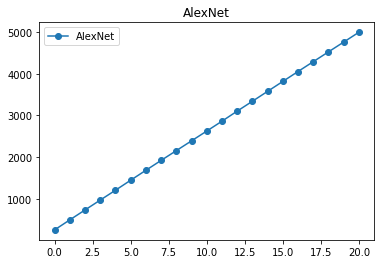

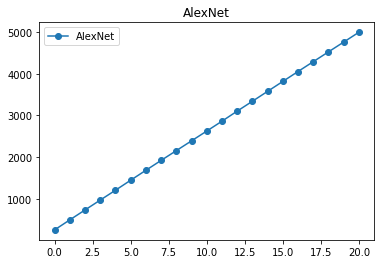

In [270]:
visualize_train_time(training_time_df, names)

# For separate graphs
for name in names:
   visualize_train_time(training_time_df, [name])

## Full train time, seconds per epoch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


252.188317 <class 'numpy.float64'>


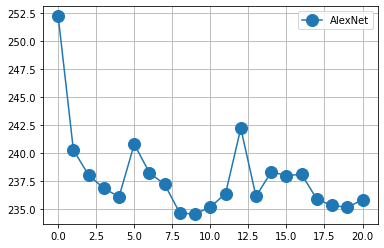

In [271]:
visualize_time_per_epoch(training_time_df, names)

## Test flow performance

In [272]:
if using_gpu:
    print(f'Fitting with GPU')
    with tf.device(device_name):
        metrics_dict = collect_metrics(models, test_flow, test_steps)
else:
    metrics_dict = collect_metrics(models, test_flow, test_steps)

Fitting with GPU
681/681 [==============================] - 53s 78ms/step - loss: 0.3093 - acc: 0.9001


In [273]:
test_metrics_df = pd.DataFrame(metrics_dict).transpose()

normalize_col(
    test_metrics_df,
    [
        'data_eval_time_sec',
        'tr_params',
        'test_loss^(-1)'
    ]
)

if saving_metrics_report:
    print(f'Saving metrics to {evaluation_path}')
    test_metrics_df.to_csv(evaluation_path + 'test_metrics_res.csv')
    
test_metrics_df.head()

Saving metrics to /content/drive/MyDrive/UNIPD/HDA/Project/SavedModels/2022-06-02-Demo/trial-AlexNetCLAHE/


,F1,data_eval_time_sec,data_size,precision,recall,test_accuracy,test_loss^(-1),tr_params,data_eval_time_sec_norm,tr_params_norm,test_loss^(-1)_norm
AlexNet,0.900607,53.48697,681.0,0.902011,0.900147,0.900147,0.309342,62381347.0,1.0,1.0,1.0


<Figure size 1080x1080 with 0 Axes>

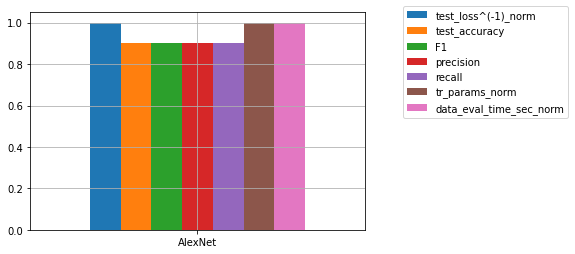

In [283]:
metrics_to_show = [
                   'test_loss^(-1)_norm',
                   'test_accuracy',
                   'F1',
                   'precision',
                   'recall',
                   
                   'tr_params_norm',
                   'data_eval_time_sec_norm'
]

plt.figure(figsize = (15, 15))
ax = test_metrics_df.loc[:, metrics_to_show].plot.bar(
    rot = 0,
    width = 0.9
)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.grid()

## Confusion matrices

In [ ]:
for m_name, model in models.items():
    test_flow.reset()
    plot_confusion_matrix(
        Y_true = test_flow.classes, 
        Y_pred = model.flow_predict(
            test_flow,
            test_steps
        ),
        class_indices = test_flow.class_indices
    )

## Learning curves

In [275]:
histories_path = f'{evaluation_path}/Histories/'
histories_dfs = {}

In [276]:
for name in names:
    file_path = f'{histories_path}{name}_history.csv'
    df = pd.read_csv(file_path)
    histories_dfs[name] = df

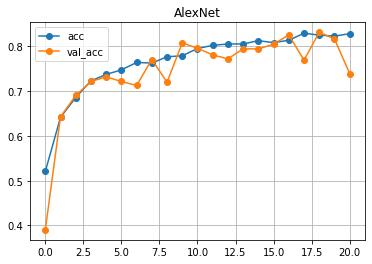

In [277]:
plot_learning_curves(histories_dfs)

## Layers interpretation

In [278]:
img_n = 7

We have:
        11 by 11 kernel, 
        of 3 color channels,
        total: 96 kernels


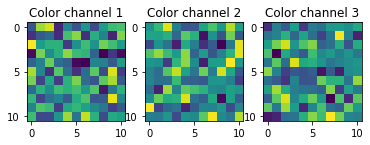

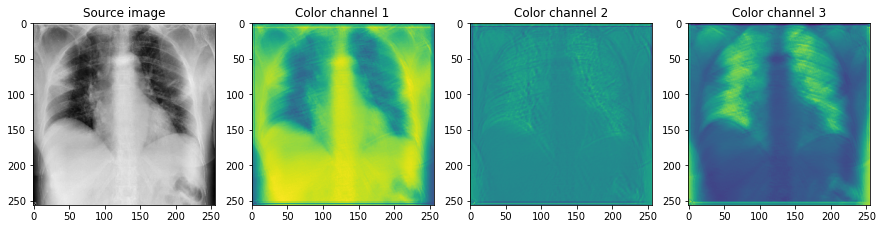

In [279]:
if 'AlexNet' in names:
    visualize_kernel_work(
        model = models['AlexNet'].model, 
        n_layer = 0, 
        n_kernel = 0, 
        
        image = test_flow[img_n][0][0],
        label = test_flow[img_n][1][0],  # 10th image 
        n_color_channels = PreprocessingParameters.n_color_channels[0]
    )

We have:
        5 by 5 kernel, 
        of 96 color channels,
        total: 256 kernels


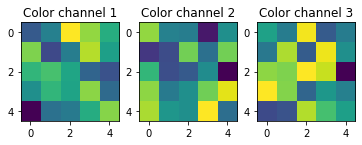

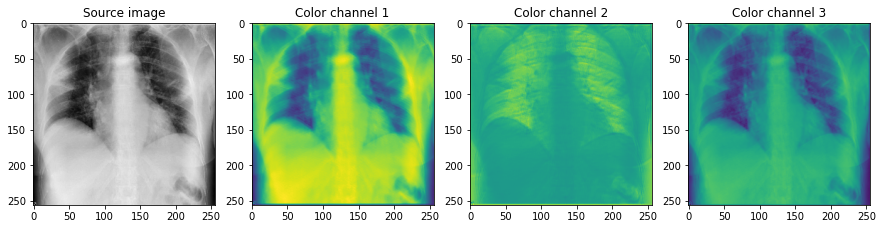

In [280]:
if 'AlexNet' in names:
    visualize_kernel_work(
        model = models['AlexNet'].model, 
        n_layer = 2, 
        n_kernel = 3, 
        
        image = test_flow[img_n][0][0],
        label = test_flow[img_n][1][0],  # 10th image 
        n_color_channels = PreprocessingParameters.n_color_channels[0]
    )

We have:
        3 by 3 kernel, 
        of 256 color channels,
        total: 384 kernels


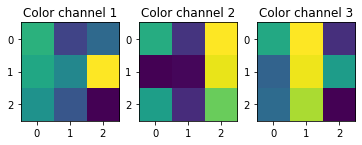

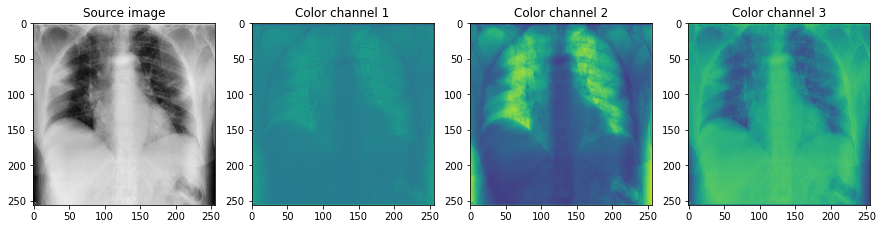

In [281]:
if 'AlexNet' in names:
    visualize_kernel_work(
        model = models['AlexNet'].model, 
        n_layer = 4, 
        n_kernel = 2, 
        
        image = test_flow[img_n][0][0],
        label = test_flow[img_n][1][0],  # 10th image 
        n_color_channels = PreprocessingParameters.n_color_channels[0]
    )

We have:
        3 by 3 kernel, 
        of 384 color channels,
        total: 256 kernels


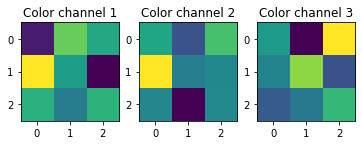

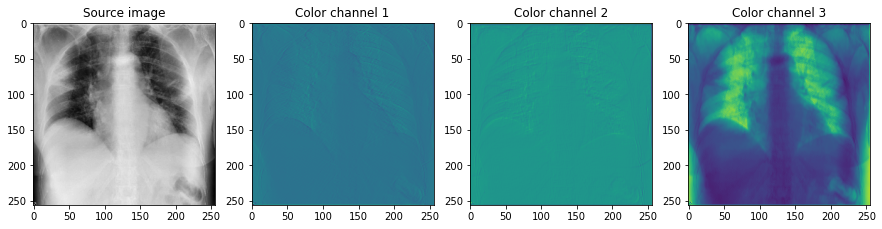

In [282]:
if 'AlexNet' in names:
    visualize_kernel_work(
        model = models['AlexNet'].model, 
        n_layer = 6, 
        n_kernel = 2, 
        
        image = test_flow[img_n][0][0],
        label = test_flow[img_n][1][0],  # 10th image 
        n_color_channels = PreprocessingParameters.n_color_channels[0]
    )